In [0]:
try:
  # %tensorlow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
      pass

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


# **Convolutional Neural Network**
이미지 분류에 사용되는 일반적인 컨볼루션 신경망의 구조는 특징 추출기(Feature Extractor)와 분류기(Classifier)가 합쳐있는 형태이다

이 가운데 특징 추출기의 역할을 하는 것은 컨볼루션 레이어와 풀링 레이어이며, Dense 레이어는 분류기의 역할을 한다.
- 특징 추출기에는 컨볼루션 레이어와 풀링 레이어가 교차되며 배치
- 분류기에는 Dense 레이어가 배치되며, 과적합을 막기위해 드롭아웃 레이어가 Dense 레이어 사이에 배치됨. 마지막 Dense 레이어 뒤에는 드롭아웃 레이어가 배치 되지 않는다.

![대체 텍스트](http://www.aitimes.kr/news/photo/201801/11294_10948_3325.png)


* Flatten layer: 다차원의 이미지를 1차원으로 평평하게 바꿔주는 레이어
* Dense layer: 신경망에서 가장 기본이 되는 레이어로, 각 뉴런이 서로 완전히 연결되기 때문에 완전 연결(Fully Connected) 레이어라고도 함



##**Con2D 레이어 생성하기**

주요 인수: **kernel_size, strides, padding, filters**



1.   kernal size : 필터 행렬의 크기 (높이, 너비), 숫자 하나만 쓰면 동일한 높이 너비

2.   strides : 필터 계산 과정에서 한 스텝마다 이동하는 크기, 기본값(1,1)

3.   padding : 경계 처리 방법 정의
       - valid: 사용하지 않음. 따라서 출력 이미지 사이즈는 입력 사이즈보다 작음
       - same: 빈값을 넣어서 출력 이미지의 크기를 입력과 같도록 보존
4.   filters : 필터의 개수. 많을수록 좋지만, 너무 많으면 학습속도 느려지거나 과적합 일어남. (vgg는 네트워크가 깊어질수록 필터의 수 2배씩)

5. input_shape : 샘플 수를 제외한 입력 형태를 정의. 모델에서 첫 레이어일 때만
      - 흑백영상인 경우에는 채널이 1이고
      - 컬러(RGB)영상인 경우에는 채널을 3으로 설정.

6. activation : 활성화 함수 설정합니다.
      - linear : 디폴트 값, 입력뉴런과 가중치로 계산된 결과값이 그대로 출력으로 나온다.
      - relu : rectifier 함수, 은닉층에 주로 쓰임.
      - sigmoid : 시그모이드 함수, 이진 분류 문제에서 출력층에 주로 쓰임
      - softmax : 소프트맥스 함수, 다중 클래스 분류 문제에서 출력층에 주로 쓰임.
      



In [0]:
conv1 = tf.keras.layers.Conv2D(kernel_size=(3,3),strides=(2,2), padding='valid',filters=16)

##**Maxpooling** 
: 이미지 특징을 축소하는 풀링 기법 중 정해진 구역 안에서 최댓값을 뽑아내는 것
![대체 텍스트](http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_12.png)

MaxPool2D()
주요인수 : **pool_size**
*   pool_size : 한 번에 Max 연산을 수행할 범위. 
*   strides: 풀링 창을 이동 하는 과정에서 스텝의 크기
*   poo_size=(2,2)와 strides=(2,2)으로 수행할 경우 이미지 크기의 너비, 높이가 각각 절반으로 줄어듦.


In [0]:
pool= tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2))

##**Droupout**
: 과적합을 막기 위한 기법으로, 은닉층에 배치된 노드 중 일부를 임의로 꺼주는 것

간단한 레이어지만 AlexNet, VGG, GoogleNet, DenseNet 등 거의 모든 주요 컨볼루션 신경망에 사용됨. 

드롭아웃 레이어도 가중치가 없기 때문에 학습되지 않는다.

![대체 텍스트](http://opennmt.net/OpenNMT/img/dropout.jpg)

주요인수 : **rate**
*   rate: 제외할 뉴런의 비율

In [0]:
pool1 = tf.keras.layers.Dropout(rate=0.3)

# **Fashion MNIST 예제 실습** 

### 데이터 불러오기

In [3]:
fashion_mnist= tf.keras.datasets.fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


###데이터 형태 확인하기

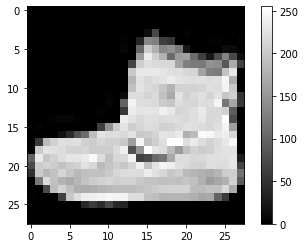

9


In [4]:
import matplotlib.pyplot as plt
plt.imshow(train_X[0],cmap='gray')
plt.colorbar()
plt.show()
print(train_Y[0]) # 데이터의 이미지가 0에서 255까지의 값을 가지는 28*28 픽셀 크기의 2차원 이미지

###데이터 정규화
- 0에서 255까지의 값을 갖는 이미지의 각 픽셀값을 255로 나누면 0.0~1. 사이의 값으로 정규화된다

In [5]:
train_X= train_X/255.0
test_X= test_X/255.0

print(train_X[0]) #0.0~1.0 사이 값으로 정규화

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

###데이터 shape 바꾸기
Con2D 레이어는 채널을 가진 형태의 데이터를 받도록 기본적으로 설정돼 있기 채널을 갖도록 데이터의 shape를 바꾼다


*   Fashion MNIST 데이터를 구성하는 흑백 이미지는 1개의 채널을 갖기 때문에 reshape() 함수를 사용해 데이터의 가장 뒤쪽에 채널 자원을 ㅜ가
* 60000* 28* 28 -> 60000* 28 *28 *1




In [9]:
#rehape 이전
print(train_X.shape, test_X.shape)

train_X=train_X.reshape(-1,28,28,1)
test_X=test_X.reshape(-1,28,28,1)

#reshape 이후
print(train_X.shape, test_X.shape)


(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


###데이터 전체 그래프를 통해 범주 확인하기
![대체 텍스트](https://i1.wp.com/www.marktechpost.com/wp-content/uploads/2019/07/image-16.png?resize=171%2C377&ssl=1)

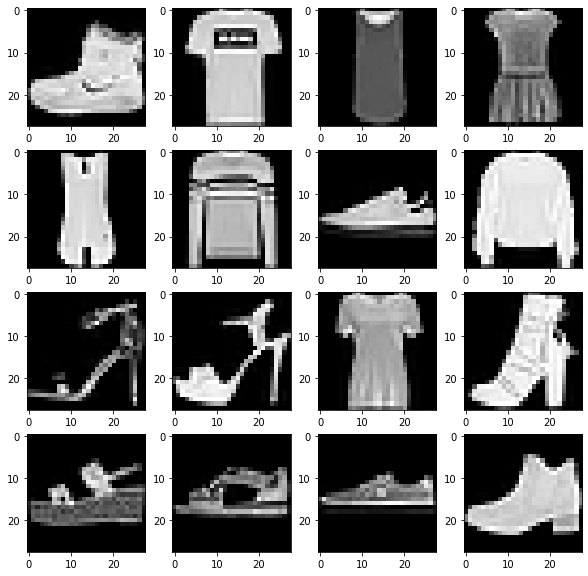

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


In [0]:
plt.figure(figsize=(10,10))
for c in range(16):
    plt.subplot(4,4,c+1) #4행 4열로 지정한 그리드에서 c+1번쨰의 칸에 그래프 그림.1~16번째 칸을 채우게 됨
    plt.imshow(train_X[c].reshape(28,28),cmap='gray') #2차원 데이터로 다시 변환
plt.show()     

print(train_Y[:16])



---







#**모델 생성**

##**모델 정의하기**
- 3개의 Con2D 레이어 사용, 필터의 수는 16, 32, 64로 뒤로 갈수록 2배씩 늘림
- Flatten 레이어로 다차원 데이터를 1차원으로 정렬
- 2개의 Dense 레이어를 사용해 분류기를 만듦

In [0]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=16),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),  # 3개의 컨볼루션 레이어, 필터의 수 2배씩 늘림
    tf.keras.layers.Flatten(),  #1차원으로 정렬
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',  # sparse는 희소행렬(대부분의 값이 0인 행렬)을 이용함. 별도의 데이터 전처리(원-핫 인코딩) 없이 희소 행렬을 나타내는 데이터를 정답행렬로 사용
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3965056   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 3,989,642
Trainable params: 3,989,642
Non-trainable params: 0
______________________________________________

##**모델 학습하기**

Epoch 1/25
1407/1407 [==============================] - 8s 5ms/step - loss: 0.4740 - accuracy: 0.8327 - val_loss: 0.3873 - val_accuracy: 0.8594
Epoch 2/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.3402 - accuracy: 0.8759 - val_loss: 0.3636 - val_accuracy: 0.8711
Epoch 3/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2839 - accuracy: 0.8958 - val_loss: 0.3808 - val_accuracy: 0.8705
Epoch 4/25
1407/1407 [==============================] - 8s 5ms/step - loss: 0.2462 - accuracy: 0.9092 - val_loss: 0.4010 - val_accuracy: 0.8692
Epoch 5/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2069 - accuracy: 0.9238 - val_loss: 0.4398 - val_accuracy: 0.8644
Epoch 6/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.1870 - accuracy: 0.9307 - val_loss: 0.4902 - val_accuracy: 0.8633
Epoch 7/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.1617 - accuracy: 0.9398 - val_loss: 0.4945 - val_accuracy:

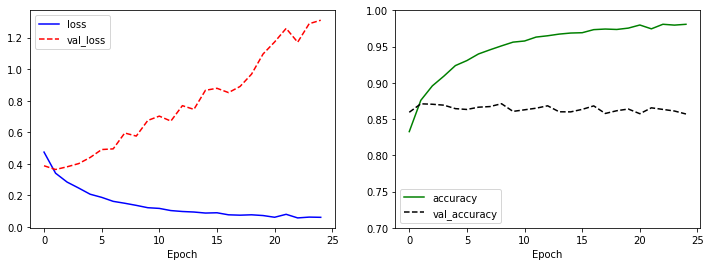

[1.360890507698059, 0.8518999814987183]

In [0]:
history= model.fit(train_X,train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label='accuracy')
plt.plot(history.history['val_accuracy'],'k--',label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()
plt.show()
model.evaluate(test_X,test_Y,verbose=0)



##**풀링 레이어, 드롭아웃 레이어 추가**
풀링 레이어와 드롭아웃 레이어를 추가하여 모델의 accuracy를 높여보자
* 풀링 레이어: 중요한 정보만 남기고 계산 부담을 줄여주는 역할
* 드롭아웃 레이어: 과적합을 방지하는 역할

In [10]:
model=tf.keras.Sequential([
                           tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32),
                           tf.keras.layers.MaxPool2D(strides=(2,2)),
                           tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
                           tf.keras.layers.MaxPool2D(strides=(2,2)),
                           tf.keras.layers.Conv2D(kernel_size=(3,3),filters=128),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(units=128, activation='relu'),
                           tf.keras.layers.Dropout(rate=0.3),
                           tf.keras.layers.Dense(units=10, activation='softmax')
])                         
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

##**모델 학습**

Epoch 1/15
1407/1407 [==============================] - 10s 7ms/step - loss: 0.5267 - accuracy: 0.8096 - val_loss: 0.3656 - val_accuracy: 0.8627
Epoch 2/15
1407/1407 [==============================] - 9s 7ms/step - loss: 0.3583 - accuracy: 0.8708 - val_loss: 0.3269 - val_accuracy: 0.8811
Epoch 3/15
1407/1407 [==============================] - 9s 7ms/step - loss: 0.3179 - accuracy: 0.8861 - val_loss: 0.3062 - val_accuracy: 0.8899
Epoch 4/15
1407/1407 [==============================] - 10s 7ms/step - loss: 0.2892 - accuracy: 0.8947 - val_loss: 0.3040 - val_accuracy: 0.8959
Epoch 5/15
1407/1407 [==============================] - 9s 7ms/step - loss: 0.2702 - accuracy: 0.9019 - val_loss: 0.3017 - val_accuracy: 0.8893
Epoch 6/15
1407/1407 [==============================] - 10s 7ms/step - loss: 0.2469 - accuracy: 0.9095 - val_loss: 0.2992 - val_accuracy: 0.8930
Epoch 7/15
1407/1407 [==============================] - 10s 7ms/step - loss: 0.2348 - accuracy: 0.9134 - val_loss: 0.2966 - val_accur

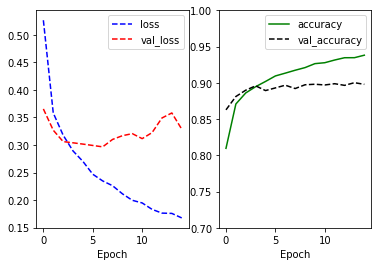

[0.3390422761440277, 0.8960999846458435]

In [11]:
history= model.fit(train_X, train_Y, epochs=15, validation_split=0.25)

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b--',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label='accuracy')
plt.plot(history.history['val_accuracy'],'k--',label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()

plt.show()

model.evaluate(test_X,test_Y,verbose=0)




---











#**더 많은 레이어 쌓기**
딥러닝에서 네트워크 구조를 깊게 쌓는 것이 가능해진 후 딥러닝의 발전을 이끈 컨볼루션 신경망에서는 컨볼루션 레이어가 중첩된 더 깊은 구조가 계속해서 나타났고, 그럴 때마다 이전 구조의 퍼포먼스를 크게 개선했다.


그림과 같이 점점 더 많은 레이어가 추가되고 2015년 ResNet 모델에서는 무려 152개의 레이어가 중첩된다.

![대체 텍스트](https://user-images.githubusercontent.com/31475037/63636149-9351e780-c6a6-11e9-8451-7b9f0d9ae52f.PNG)


##**VGGNet 스타일의 컨볼루션 신경망 모델 정의**
VGGNet은 여러 개의 구조로 실험했는데 그 중 19개의 레이어가 겹쳐진 VGG-19가 제일 깊은 구조이다. 
- VGG-19는 특징 추출기의 초반에 컨볼루셔 레이어를 2개 겹친 뒤 풀링 레이어 1개를 사용하는 패턴을 2차례, 그 후 컨볼루션 레이어를 4개 겹친 뒤 풀링 레이어 1개를 사용하는 패턴을 3차례 반복한다.

- 여기서는 위의 모델을 더 간단하게 하여, 컨볼루션 레이어를 2개 겹치고 풀링레이어 1개 사용하는 패턴을 2차례 반복한다. 그리고 풀링레이어 다음에 드롭아웃 레이어를 위치시켜 과적합 방지하고 Flatten 레이어 다음에 이어지는 3개의 Dense 레이어 사이에도 드롭아웃 레이어를 배치해본다




In [12]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3),filters=32, padding='same', activation='relu'),
                             tf.keras.layers.Conv2D(kernel_size=(3,3),filters=64, padding='same', activation='relu'),
                             tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Conv2D(kernel_size=(3,3),filters=128,padding='same',activation='relu'),
                             tf.keras.layers.Conv2D(kernel_size=(3,3),filters=256,padding='same',activation='relu'),
                             tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units=512, activation='relu'),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Dense(units=512, activation='relu'),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Dense(units=10,activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 256)       295168    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 256)        

###**VGGNet 스타일의 컨볼루션 신경망 모델 학습**

In [0]:
history=model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b--',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label='accuracy')
plt.plot(history.history['val_accuracy'],'k--',label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()

plt.show()

model.evaluate(test_X,test_Y,verbose=0)



---



#**이미지 보강 훈련**


이미지 보강(Image Augmentation)은 훈련 데이터에 없는 이미지를 새롭게 만들어내서 훈련 데이터를 보강강하는 것이다. 이때 새로운 이미지는 훈련 데이터의 이미지를 원본으로 삼고 일정한 변형을 가해서 만들어진다.


예를 들어, 신발 이미지가 훈련데이터에 있을 떄 신발코가 왼쪽을 향하는 이미지만 훈련 데이터에 있고 테스트 데이터에는 오른쪽을 향하는 이미지가 있을 경우, 컨볼루션 신경망은 테스트 데이터에서 새롭게 나오는 이미지에 대해 좋은 퍼포먼스를 내지 못함.


이때 
- 이미지를 가로로 뒤집거나(horizontal flip),
- 신발코가 오른쪽을 향하는 이미지도 만들고, 
- 약간 회전시키거나(rotate), 
- 기울이거나(shear),
- 일부 확대하거나(zoom),
- 평행 이동시켜(shift) 

다양한 이미지를 만들어내서 훈련 데이터의 표현력을 더 좋게 만든다.



#**ImageDataGenerator**

tf.keras에 있는 이미지 보강 작업을 쉽게 해주는 패키지이다.

주요인수
- rotation_range
- zoom_range
- shear_range
- horizontal_flip 
( vertical_flip은 사용하지 않음. Fashion MNIST에느 보통 이미지가 위아래로 반듯하게 놓여있기 떄문에 세로축으로 뒤집으면 대비하지 않아도 될 겨우에 대해서도 대비하게 되어 퍼포먼스가 떨어짐

flow(): 실제로 보강된 이미지 생성. 이 함수는 Iterator라는 객체를 만드는데, 이 객체에서는 값을 순차적으로 꺼낼 수 있음. 값을 꺼내는 방법은 next() 함수를 쓰는 것

batch_size: flow() 함수 사용할 떄 한 번에 생성할 이미지의 양

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

image_generator= ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.10,
    shear_range=0.5,
    width_shift_range=0.10, #왼쪽 오른쪽으로 움직임
    height_shift_range=0.10, #위 아래로 움직임
    horizontal_flip=True,
    vertical_flip=False)

augment_size=100

x_augmented=image_generator.flow(np.tile(train_X[0].reshape(28*28),100).reshape(-1,28,28,1), #np.tile(A,reps):A를 reps에 정해진 혁식만큼 반복한 값 반환. 여기서는 A를 100번 반복한 값
                             np.zeros(augment_size),batch_size=augment_size, shuffle=False).next()[0]

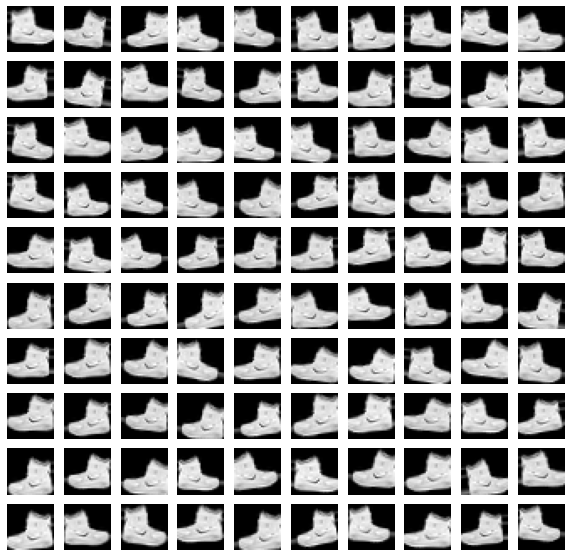

In [0]:
#새롭게 생성된 이미지 표시
plt.figure(figsize=(10,10))
for c in range(100):
  plt.subplot(10,10,c+1)
  plt.axis('off')
  plt.imshow(x_augmented[c].reshape(28,28),cmap='gray')
plt.show()


##**이미지 보강**

훈련 데이터의 50%인 30,0000개의 이미지 추가하기

In [0]:
image_generator = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.10,
    shear_range=0.5,
    width_shift_range=0.10,
    height_shift_range=0.10,
    horizontal_flip=True,
    vertical_flip=False)

augment_size=30000

randidx= np.random.randint(train_X.shape[0], size=augment_size) # 이미지를 변형할 원본 이미지를 찾기 위해서 0~59,999범위의 정수 중에서 30,000개의 정수를 뽑음, 중복 허용하고 싶지 않을 땐 np.random.choice()함수 사용하기
x_augmented=train_X[randidx].copy() #원본데이터에서 참조하는 형태이기에 원본 데이터에 영햐을 주지 않기 위해 copy() 함수로 복사본 만들어줌
y_augmented=train_Y[randidx].copy()
x_augmented=image_generator.flow(x_augmented, np.zeros(augment_size),batch_size=augment_size, shuffle=False).next()[0]

train_X=np.concatenate((train_X,x_augmented)) #보강된 이미지 추가
train_Y=np.concatenate((train_Y,y_augmented))

print(train_X.shape)

(90000, 28, 28, 1)


##**VGGNET style 네트워크 + 이미지 보강학습**

###모델 정의하기

In [0]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3),filters=32, padding='same', activation='relu'),
                             tf.keras.layers.Conv2D(kernel_size=(3,3),filters=64, padding='same', activation='relu'),
                             tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Conv2D(kernel_size=(3,3),filters=128,padding='same',activation='relu'),
                             tf.keras.layers.Conv2D(kernel_size=(3,3),filters=256,padding='same',activation='relu'),
                             tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units=512, activation='relu'),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Dense(units=512, activation='relu'),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Dense(units=10,activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 256)        

###모델 학습하기

Epoch 1/25
2110/2110 [==============================] - 16s 8ms/step - loss: 0.5426 - accuracy: 0.8013 - val_loss: 0.5601 - val_accuracy: 0.7860
Epoch 2/25
2110/2110 [==============================] - 16s 8ms/step - loss: 0.3671 - accuracy: 0.8665 - val_loss: 0.5251 - val_accuracy: 0.8005
Epoch 3/25
2110/2110 [==============================] - 16s 8ms/step - loss: 0.3311 - accuracy: 0.8806 - val_loss: 0.4751 - val_accuracy: 0.8188
Epoch 4/25
2110/2110 [==============================] - 16s 8ms/step - loss: 0.3152 - accuracy: 0.8869 - val_loss: 0.4205 - val_accuracy: 0.8416
Epoch 5/25
2110/2110 [==============================] - 16s 8ms/step - loss: 0.3010 - accuracy: 0.8929 - val_loss: 0.4427 - val_accuracy: 0.8285
Epoch 6/25
2110/2110 [==============================] - 16s 8ms/step - loss: 0.2936 - accuracy: 0.8946 - val_loss: 0.4175 - val_accuracy: 0.8438
Epoch 7/25
2110/2110 [==============================] - 16s 8ms/step - loss: 0.2866 - accuracy: 0.8965 - val_loss: 0.4009 - val_ac

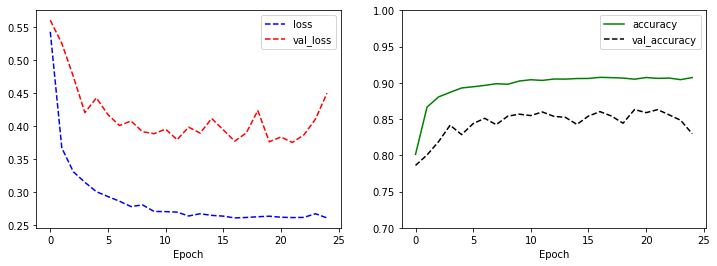

[0.25681793689727783, 0.9035000205039978]

In [0]:
history=model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b--',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label='accuracy')
plt.plot(history.history['val_accuracy'],'k--',label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()

plt.show()

model.evaluate(test_X,test_Y,verbose=0)

##**모델을 통해 test 데이터 예측하기**

In [0]:
predictions = model.predict(test_X)

print(predictions[20]) 
print([round(p, 4) for p in predictions[20])



[1.0762301e-04 7.1451452e-12 9.9409431e-01 3.9202035e-07 7.7138416e-04
 7.1004856e-13 5.0256262e-03 1.8604255e-14 7.6817565e-07 1.2467946e-12]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0126, 0.0, 0.9874]


In [0]:
print(np.argmax(predictions[20]))


2


In [0]:
test_Y[20]

2

## MNIST 손글씨 데이터를 통해 CNN 실습

In [0]:
mnist= tf.keras.datasets.mnist
(train_x,train_y), (test_x,test_y) = mnist.load_data()

#rehape 이전
print(train_x.shape, test_x.shape)

train_x=train_x.reshape(-1,28,28,1)
test_x=test_x.reshape(-1,28,28,1)

#reshape 이후
print(train_x.shape, test_x.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [0]:
model2 = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3),filters=32, padding='same', activation='relu'),
                             tf.keras.layers.Conv2D(kernel_size=(3,3),filters=64, padding='same', activation='relu'),
                             tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Conv2D(kernel_size=(3,3),filters=128,padding='same',activation='relu'),
                             tf.keras.layers.Conv2D(kernel_size=(3,3),filters=256,padding='same',activation='relu'),
                             tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units=512, activation='relu'),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Dense(units=512, activation='relu'),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Dense(units=10,activation='softmax')
])

model2.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 256)         0

Epoch 1/20
1407/1407 [==============================] - 28s 20ms/step - loss: 0.0971 - accuracy: 0.9767 - val_loss: 0.0397 - val_accuracy: 0.9893
Epoch 2/20
1407/1407 [==============================] - 28s 20ms/step - loss: 0.0938 - accuracy: 0.9766 - val_loss: 0.0407 - val_accuracy: 0.9904
Epoch 3/20
1407/1407 [==============================] - 28s 20ms/step - loss: 0.1009 - accuracy: 0.9758 - val_loss: 0.0371 - val_accuracy: 0.9899
Epoch 4/20
1407/1407 [==============================] - 28s 20ms/step - loss: 0.0971 - accuracy: 0.9769 - val_loss: 0.0494 - val_accuracy: 0.9881
Epoch 5/20
1407/1407 [==============================] - 28s 20ms/step - loss: 0.1007 - accuracy: 0.9763 - val_loss: 0.0423 - val_accuracy: 0.9911
Epoch 6/20
1407/1407 [==============================] - 28s 20ms/step - loss: 0.0863 - accuracy: 0.9786 - val_loss: 0.0362 - val_accuracy: 0.9902
Epoch 7/20
1407/1407 [==============================] - 28s 20ms/step - loss: 0.0913 - accuracy: 0.9774 - val_loss: 0.0438 -

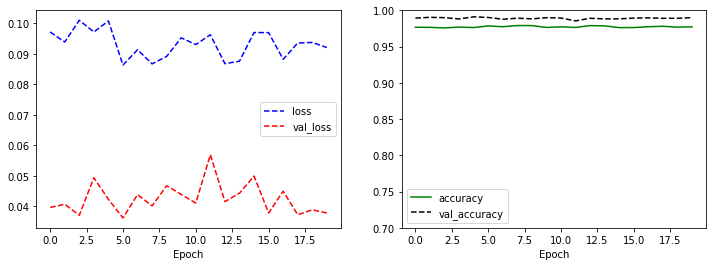

[0.02917543612420559, 0.991100013256073]

In [0]:
history=model2.fit(train_x, train_y, epochs=20, validation_split=0.25)


import matplotlib.pyplot as plt


plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b--',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label='accuracy')
plt.plot(history.history['val_accuracy'],'k--',label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()

plt.show()

model2.evaluate(test_x,test_y,verbose=0)